<div>
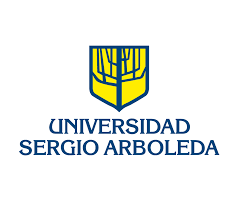<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Joaquin Fernando Cifuentes
<br>
<i><b>Asignatura:</b></i> Sistemas Complejos
<br>
<i><b>Estudiantes:</b></i> Daniel Velasquez, Laura Ojeda, Esteban Rodriguez y Santiago Niño
<br>
<i><b>Tema:</b></i> Simulación diagrama de bifurcación de las conexiones de internet en Colombia
<br>
<i><b>Fecha:</b></i> 20 de abril del 2024
<br>
</FONT>
</div>

#**Objetivo**

Utilizando datos históricos reales de conexiones a internet en Colombia, tanto móviles como fijas, aplicaremos un modelo de bifurcación logística para simular el comportamiento caótico del crecimiento del sistema a lo largo de los años. Este enfoque nos permitirá visualizar cómo el sistema ha experimentado un crecimiento no lineal y caótico, reflejando la complejidad de su evolución y contribuyendo al aumento sostenido de las conexiones a internet en el país.

#**Definición Conceptos Clave**

*   Conexiones a Internet: Se refiere a la cantidad de dispositivos o usuarios que están conectados a la red de internet en un área específica durante un período de tiempo determinado. Pueden ser conexiones móviles, que incluyen dispositivos como teléfonos inteligentes y tablets, o conexiones fijas, como las de hogares u oficinas.

*   Modelo de Bifurcación Logística: Es un modelo matemático utilizado para simular el comportamiento de sistemas dinámicos no lineales, como el crecimiento de una población o el número de conexiones a internet. Se basa en una ecuación diferencial no lineal que describe cómo una variable cambia con el tiempo en función de su valor actual.

*   Comportamiento Caótico: Se refiere a la aparente aleatoriedad y sensibilidad a las condiciones iniciales que exhiben ciertos sistemas dinámicos no lineales. En el contexto de las conexiones a internet, el comportamiento caótico puede manifestarse en un crecimiento no lineal y altamente variable a lo largo del tiempo.

*   Crecimiento Exponencial: Es un tipo de crecimiento en el que una cantidad aumenta a una tasa constante por unidad de tiempo. En el contexto de las conexiones a internet, el crecimiento exponencial puede observarse cuando el número de conexiones aumenta a una tasa constante en relación con el tamaño actual de la red.

#**Importación librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

#**Implementación de funciones**

In [ ]:
def logistic(r: float, x: float) -> float:
    """
    Función logística que calcula el valor resultante de aplicar la ecuación logística a un valor inicial.

    Parámetros:
    - r (float): Parámetro de crecimiento o tasa de reproducción.
    - x (float): Valor inicial.

    Retorna:
    - float: El valor resultante de aplicar la ecuación logística.
    """
    return r * x * (1 - x)

In [ ]:
def bifurcate(seeds, n_skip, n_iter, step=0.0001, r_min=2.9, r_max=4.0):
    """
    Función que simula el comportamiento de un sistema dinámico mediante el modelo de bifurcación logística.

    Parámetros:
    - seeds (array): Valores iniciales para la simulación.
    - n_skip (int): Número de iteraciones para omitir al principio.
    - n_iter (int): Número de iteraciones para mostrar.
    - step (float): Tamaño del paso para generar valores de parámetros.
    - r_min (float): Valor mínimo del parámetro de crecimiento.
    - r_max (float): Valor máximo del parámetro de crecimiento.

    Retorna:
    - X (list): Lista de valores de parámetro de crecimiento.
    - Y (list): Lista de valores resultantes.
    """
    X = []
    Y = []
    _range = np.linspace(r_min, r_max, int((r_max - r_min) / step))
    for r in _range:
        for seed in seeds:
            x = seed
            for _ in range(n_skip):
                x = logistic(r, x)
            for _ in range(n_iter):
                x = logistic(r, x)
                X.append(r)
                Y.append(x)
    plt.figure(figsize=(15, 8))
    plt.plot(X, Y, ls='', marker=',', color='black')
    plt.ylim(0, 1)
    plt.xlim(r_min, r_max)
    plt.xlabel('Parámetro de crecimiento (r)')
    plt.ylabel('Valor resultante')
    plt.title('Diagrama de bifurcación')
    plt.show()

In [ ]:
def generate_orbit(x0_1, x0_2, valores_datos_escalonados, rango_r, n):
    """
    Genera y visualiza órbitas para el mapeo logístico con parámetros dados.

    Parámetros:
    x0_1 : float
        Valor inicial para la primera órbita.
    x0_2 : float
        Valor inicial para la segunda órbita.
    valores_datos_escalonados : lista
        Lista de valores de datos escalados (no se utiliza en la función, se proporciona como referencia).
    rango_r : lista
        Lista de valores de r (tasa de crecimiento) para generar múltiples órbitas.
    n : int
        Número de iteraciones para calcular la órbita.

    Retorna:
    None
    """
    plt.figure(figsize=(15, 6))

    plt.figure(figsize=(15, 6))

    orbita_1 = [x0_1]
    orbita_2 = [x0_2]

    for r, scaled_value in zip(r_range, scaled_data_values):
        orbita_1 = [x0_1]
        for i in range(n - 1):
            orbita_1.append(logistic(orbita_1[-1], r))
        plt.plot(range(n), orbita_1, marker='s', label=f'r={r}, scaled_value={scaled_value}')

    for i in range(n - 1):
        orbita_2.append(logistic(orbita_2[-1], r_range[0]))
    plt.plot(range(n), orbita_2, marker='<', color='gray', label=f'r={r_range[0]}')

    plt.xlabel('Iterations')
    plt.ylabel('x')
    plt.title('Orbits Generated by Logistic Map')
    plt.grid(True)
    plt.show()

def logistic(x, r):
    """
    Función del mapa logístico que calcula el siguiente valor de x.

    Parámetros:
    x : float
        Valor actual de x.
    r : float
        Tasa de crecimiento.

    Retorna:
    float
        Siguiente valor de x en la órbita.
    """
    return r * x * (1 - x)


#**Diagrama de bifurcación**

In [ ]:
values = [274590.0, 522857.0, 1264763.0]

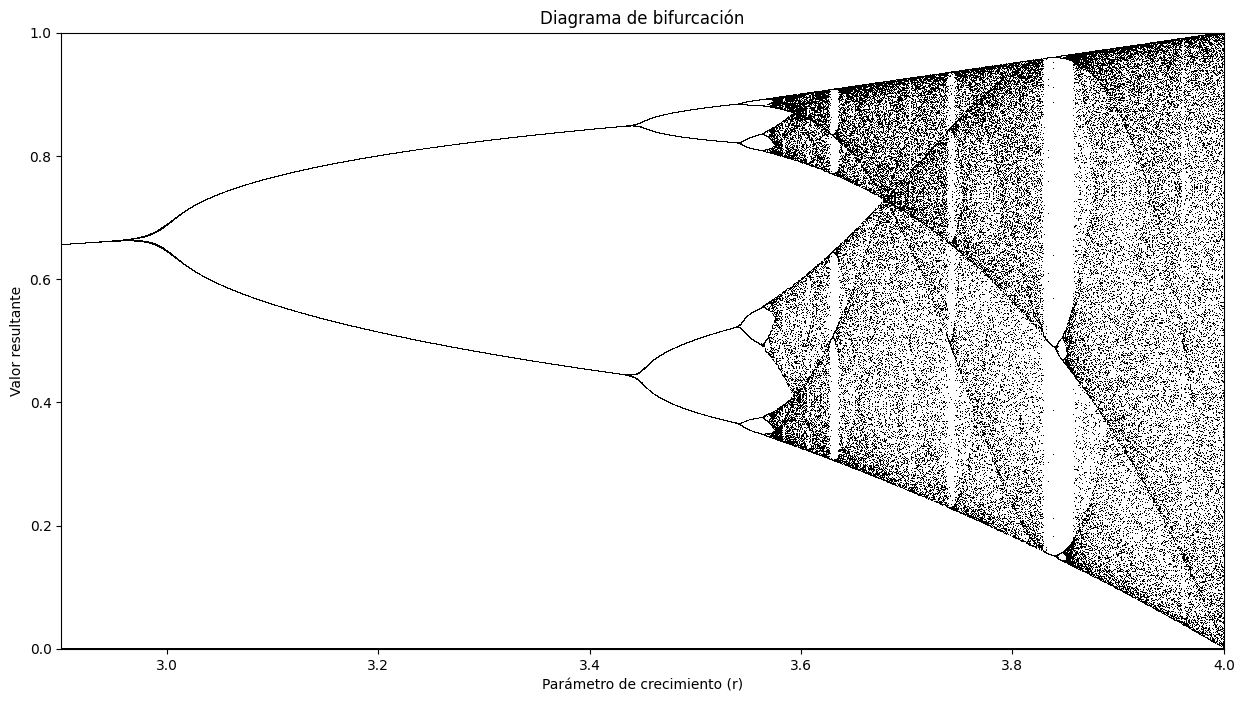

In [ ]:
# Ajustar la escala para los valores de semilla
scaled_data_values = values / np.max(values)

# Generar el diagrama de bifurcación
bifurcate(scaled_data_values, 100, 10, r_min=2.9)

El diagrama de bifurcación es una representación visual de la evolución de un sistema dinámico, específicamente el modelo de bifurcación logística, a medida que varía un parámetro de crecimiento (r). Al pasar por diferentes valores de r, el sistema exhibe una variedad de comportamientos, que pueden incluir estabilidad, bifurcaciones periódicas y caos. Cada punto en el diagrama representa el valor resultante del sistema después de un número de iteraciones, mostrando así cómo cambian los estados del sistema en respuesta a cambios en el parámetro de crecimiento.

En el contexto proporcionado, los valores iniciales (semillas) se extraen de una lista denominada values, la cual es escalada para ajustarse al intervalo [0, 1]. Estos valores son entonces utilizados como puntos de partida para la simulación del comportamiento del sistema en la función bifurcate. El diagrama resultante ilustra cómo los valores resultantes evolucionan en función de los diferentes valores del parámetro de crecimiento (r), permitiendo así una comprensión visual de la dinámica del sistema bajo la influencia de la ecuación logística.

<Figure size 1500x600 with 0 Axes>

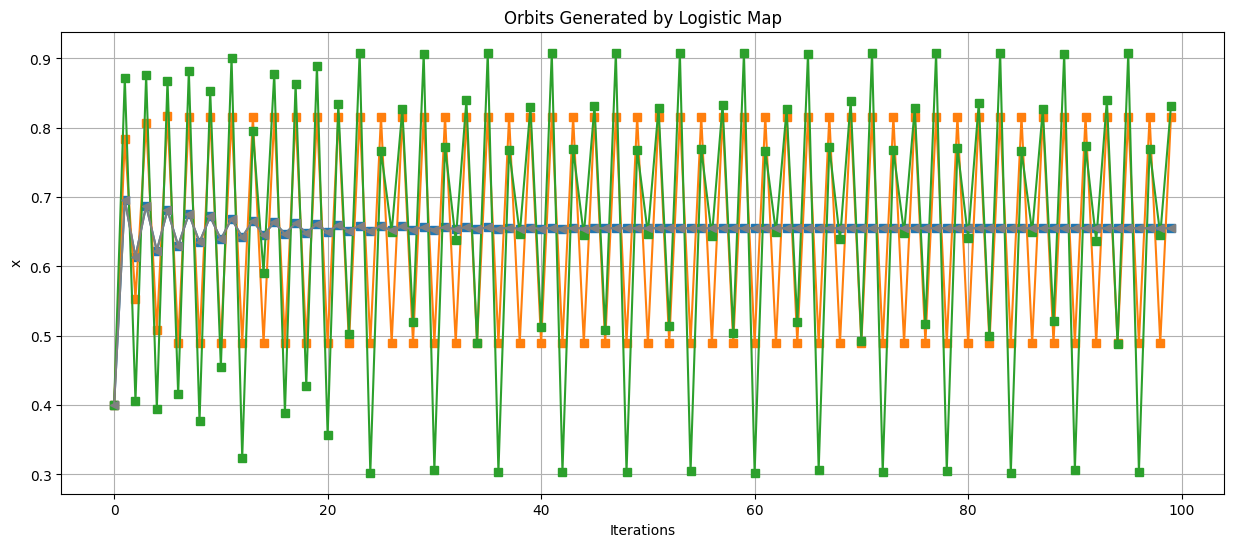

In [ ]:
# Number of iterations
n = 100

# Range of r values
r_range = np.linspace(2.9, 4.0, 4)

# Initial conditions
x0_1 = 0.4
x0_2 = 0.400000001

# Plot the orbits
generate_orbit(x0_1, x0_2, scaled_data_values, r_range, n)

El gráfico generado por la función plot_population_vs_growth muestra la evolución de la población en función del tiempo para diferentes valores iniciales (semillas) del sistema. Cada curva en el gráfico representa la trayectoria de la población a lo largo del tiempo para una semilla específica. En este contexto, los valores iniciales de población están escalados para adaptarse al intervalo [0, 1].

#**Información de los datos Suscripciones a telefonía móvil celular a nivel mundial**

Las suscripciones a telefonía móvil celular son suscripciones a un servicio público de telefonía móvil que proporciona acceso a la PSTN utilizando tecnología celular. El indicador incluye (y se divide en) el número de suscripciones pospago y el número de cuentas prepago activas (es decir, que han sido utilizadas durante los últimos tres meses). El indicador se aplica a todos los abonos de telefonía móvil que ofrecen comunicaciones de voz. Excluye las suscripciones mediante tarjetas de datos o módems USB, las suscripciones a servicios públicos de datos móviles, servicios privados de radio móvil troncalizado, telepunto, radiobúsqueda y telemetría.

Fuente: Unión Internacional de Telecomunicaciones, Informe sobre el Desarrollo Mundial de las Telecomunicaciones/TIC y base de datos.

https://datos.bancomundial.org/indicator/IT.CEL.SETS?end=2022&locations=CO&start=1960&view=chart

##**Importación de los datos**

In [ ]:
# URL del archivo en formato texto en GitHub
url = "https://raw.githubusercontent.com/SAN1713911S/Suscripciones-a-internet-celular-movil/main/suscripciones-internet-movil"

try:
    # Leer el archivo de texto desde la URL
    df = pd.read_csv(url, sep='\t')
    print(df.head())
except Exception as e:
    print("Error al cargar el archivo de texto:", e)

  Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Suscripciones a telefonía celular móvil   
1          NaN          AFE  Suscripciones a telefonía celular móvil   
2   Afganistán          AFG  Suscripciones a telefonía celular móvil   
3          NaN          AFW  Suscripciones a telefonía celular móvil   
4       Angola          AGO  Suscripciones a telefonía celular móvil   

  Indicator Code  1960  1961  1962  1963  1964  1965  ...         2013  \
0    IT.CEL.SETS   0.0   NaN   NaN   NaN   NaN   0.0  ...     138800.0   
1    IT.CEL.SETS   0.0   NaN   NaN   NaN   NaN   0.0  ...  327628287.0   
2    IT.CEL.SETS   0.0   NaN   NaN   NaN   NaN   0.0  ...   16807156.0   
3    IT.CEL.SETS   0.0   NaN   NaN   NaN   NaN   0.0  ...  290449890.0   
4    IT.CEL.SETS   0.0   NaN   NaN   NaN   NaN   0.0  ...   13285198.0   

          2014       2015         2016         2017         2018         2019  \
0     139700.0     141000          NaN   

##**Preprocesamiento de los datos**

In [ ]:
# Muestra las columnas del DataFrame
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [ ]:
# Muestra todos los valores de Country Name
df['Country Name'].unique()

array(['Aruba', nan, 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'El mundo árabe', 'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Samoa Americana', 'Antigua y Barbuda', 'Australia', 'Austria',
       'Azerbaiyán', 'Burundi', 'Bélgica', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrein', 'Bahamas',
       'Bosnia y Herzegovina', 'Belarús', 'Belice', 'Bermudas', 'Bolivia',
       'Brasil', 'Barbados', 'Brunei Darussalam', 'Bhután', 'Botswana',
       'República Centroafricana', 'Canadá',
       'Europa Central y del Báltico', 'Suiza', 'Islas del Canal',
       'Chile', 'China', "Côte d'Ivoire", 'Camerún',
       'Congo, República Democrática del', 'Congo, República del',
       'Colombia', 'Comoras', 'Cabo Verde', 'Costa Rica',
       'Estados pequeos del Caribe', 'Cuba', 'Curacao', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Djibouti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia',
       'Asia oriental y el P

In [ ]:
# Tu lista de países
paises_df = [
    'Aruba', 'Afganistán', 'Angola', 'Albania', 'Andorra', 'Emiratos Árabes Unidos',
    'Argentina', 'Armenia', 'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
    'Burundi', 'Bélgica', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas',
    'Bosnia y Herzegovina', 'Belarús', 'Belice', 'Bermudas', 'Bolivia', 'Brasil', 'Barbados',
    'Brunei Darussalam', 'Bhután', 'Botswana', 'Canadá', 'Suiza', 'Chile', 'China', "Côte d'Ivoire",
    'Camerún', 'Colombia', 'Comoras', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Chipre', 'República Checa',
    'Alemania', 'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador', 'Egipto, República Árabe de',
    'Eritrea', 'España', 'Estonia', 'Etiopía', 'Finlandia', 'Fiyi', 'Francia', 'Gabón', 'Reino Unido',
    'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Guinea Ecuatorial', 'Grecia', 'Granada',
    'Groenlandia', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong, Región Administrativa Especial', 'Honduras',
    'Croacia', 'Haití', 'Hungría', 'Indonesia', 'India', 'Irlanda', 'Irán, República Islámica del', 'Iraq',
    'Islandia', 'Israel', 'Italia', 'Jamaica', 'Jordania', 'Japón', 'Kazajstán', 'Kenia', 'Kirguistán',
    'Camboya', 'Saint Kitts y Nevis', 'Corea, República de', 'Kuwait', 'Líbano', 'Liberia', 'Libia',
    'Santa Lucía', 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lituania', 'Luxemburgo', 'Letonia',
    'Isla de San Martín (parte francesa)', 'Marruecos', 'Mónaco', 'República de Moldova', 'Madagascar',
    'Maldivas', 'México', 'Macedonia del Norte', 'Mali', 'Malta', 'Myanmar', 'Mongolia', 'Mauritania',
    'Mauricio', 'Malawi', 'Malasia', 'Namibia', 'Nueva Caledonia', 'Níger', 'Nigeria', 'Nicaragua',
    'Países Bajos', 'Noruega', 'Nepal', 'Nueva Zelanda', 'Omán', 'Pakistán', 'Panamá', 'Perú', 'Filipinas',
    'Polonia', 'Puerto Rico', 'Portugal', 'Paraguay', 'Ribera Occidental y Gaza', 'Polinesia Francesa', 'Catar',
    'Rumania', 'Federación de Rusia', 'Ruanda', 'Arabia Saudita', 'Sudán', 'Senegal', 'Singapur', 'Islas Salomón',
    'Sierra Leona', 'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'Sudán del Sur', 'Santo Tomé y Príncipe',
    'Surinam', 'Eslovaquia', 'Eslovenia', 'Suecia', 'Eswatini', 'Sint Maarten (parte holandesa)', 'Seychelles',
    'Islas Turcas y Caicos', 'Chad', 'Tailandia', 'Tayikistán', 'Turkmenistán', 'Timor-Leste', 'Tonga', 'Trinidad y Tobago',
    'Túnez', 'Turquía', 'Tuvalu', 'Tanzania', 'Uganda', 'Ucrania', 'Uruguay', 'Estados Unidos', 'Uzbekistán',
    'San Vicente y las Granadinas', 'Venezuela', 'Islas Vírgenes Británicas', 'Islas Vírgenes de los Estados Unidos',
    'Viet Nam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen', 'Sudáfrica', 'Zambia', 'Zimbabwe'
]

# Reemplazar los valores en df['Country Name'] usando el diccionario de mapeo
df = df[df['Country Name'].isin(paises_df)]

print(df)

    Country Name Country Code                           Indicator Name  \
0          Aruba          ABW  Suscripciones a telefonía celular móvil   
2     Afganistán          AFG  Suscripciones a telefonía celular móvil   
4         Angola          AGO  Suscripciones a telefonía celular móvil   
5        Albania          ALB  Suscripciones a telefonía celular móvil   
6        Andorra          AND  Suscripciones a telefonía celular móvil   
..           ...          ...                                      ...   
260        Samoa          WSM  Suscripciones a telefonía celular móvil   
261       Kosovo          XKX  Suscripciones a telefonía celular móvil   
263    Sudáfrica          ZAF  Suscripciones a telefonía celular móvil   
264       Zambia          ZMB  Suscripciones a telefonía celular móvil   
265     Zimbabwe          ZWE  Suscripciones a telefonía celular móvil   

    Indicator Code  1960  1961  1962  1963  1964  1965  ...        2013  \
0      IT.CEL.SETS   0.0   NaN   NaN

In [ ]:
df['Country Name'].unique()

array(['Aruba', 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahamas', 'Bosnia y Herzegovina', 'Belarús', 'Belice',
       'Bermudas', 'Bolivia', 'Brasil', 'Barbados', 'Brunei Darussalam',
       'Bhután', 'Botswana', 'Canadá', 'Suiza', 'Chile', 'China',
       "Côte d'Ivoire", 'Camerún', 'Colombia', 'Comoras', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Chipre', 'República Checa', 'Alemania',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto, República Árabe de', 'Eritrea', 'España', 'Estonia',
       'Etiopía', 'Finlandia', 'Francia', 'Gabón', 'Reino Unido',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Guinea Ecuatorial', 'Grecia', 'Granada', 'Groenlandia',
       'Guatemala', 'Guam', 'Guyana',
       'Hong Kong, Regió

In [ ]:
# Muestra todos los valores de Country Name
df['Indicator Name'].unique()

array(['Suscripciones a telefonía celular móvil'], dtype=object)

In [ ]:
#Mostrar la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    178 non-null    object 
 1   Country Code    178 non-null    object 
 2   Indicator Name  178 non-null    object 
 3   Indicator Code  178 non-null    object 
 4   1960            167 non-null    float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            167 non-null    float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            167 non-null    float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      float64


In [ ]:
# Eliminar las columnas 'Country Code' y 'Indicator Code'
df = df.drop(columns=['Country Code', 'Indicator Code','Indicator Name'])

# Muestra las columnas del DataFrame después de eliminar las columnas
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


In [ ]:
# Eliminar columnas que contienen solo ceros y aquellas que no tienen ningún valor
df = df.dropna(axis=1, how='all')  # Eliminar columnas sin valores no nulos
df = df.loc[:, (df != 0).any(axis=0)]  # Eliminar columnas que contienen solo ceros

# Imprimir el DataFrame limpio
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   1960          167 non-null    float64
 2   1965          167 non-null    float64
 3   1970          167 non-null    float64
 4   1975          167 non-null    float64
 5   1976          167 non-null    float64
 6   1977          167 non-null    float64
 7   1978          167 non-null    float64
 8   1979          167 non-null    float64
 9   1980          167 non-null    float64
 10  1981          166 non-null    float64
 11  1982          167 non-null    float64
 12  1983          166 non-null    float64
 13  1984          165 non-null    float64
 14  1985          165 non-null    float64
 15  1986          165 non-null    float64
 16  1987          165 non-null    float64
 17  1988          166 non-null    float64
 18  1989          165 non-null    float

In [ ]:
# Imputar los valores nulos con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

# Mostrar información sobre el DataFrame después de imputar los valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   1960          178 non-null    float64
 2   1965          178 non-null    float64
 3   1970          178 non-null    float64
 4   1975          178 non-null    float64
 5   1976          178 non-null    float64
 6   1977          178 non-null    float64
 7   1978          178 non-null    float64
 8   1979          178 non-null    float64
 9   1980          178 non-null    float64
 10  1981          178 non-null    float64
 11  1982          178 non-null    float64
 12  1983          178 non-null    float64
 13  1984          178 non-null    float64
 14  1985          178 non-null    float64
 15  1986          178 non-null    float64
 16  1987          178 non-null    float64
 17  1988          178 non-null    float64
 18  1989          178 non-null    float

In [ ]:
# Renombrar la columna 'Country Name' a 'Country'
df = df.rename(columns={'Country Name': 'Country'})

In [ ]:
df['Country'].count()

178

In [ ]:
# Corregir el tipo de datos de la columna '2015' a float64
df['2015'] = pd.to_numeric(df['2015'], errors='coerce')

##**Linea de tiempo de suscripciones a telefonía movil a nivel mundial**

In [ ]:
# Crear la figura con un tamaño más grande
fig = go.Figure()

# Obtener los nombres únicos de los países
countries = df['Country'].unique()

# Iterar sobre cada país y agregar la línea de tiempo correspondiente
for country in countries:
    # Filtrar el DataFrame por país
    country_data = df[df['Country'] == country]

    # Verificar si hay datos para el país actual
    if not country_data.empty:
        # Agregar la línea de tiempo para el país actual
        fig.add_trace(go.Scatter(x=country_data.columns[1:], y=country_data.iloc[0, 1:], mode='lines+markers', name=country))

# Configurar el diseño del gráfico y mostrar la leyenda
fig.update_layout(
    title='Suscripciones a telefonía celular móvil en todos los países (1960-2022)',
    xaxis=dict(title='Año', tickangle=45),
    yaxis=dict(title='Número de Suscripciones'),
    template='seaborn',  # Cambiar al tema oscuro para una mejor apariencia
    showlegend=True,     # Mostrar la leyenda
    legend=dict(orientation='v', x=1.02, y=0.5, bgcolor='rgba(0,0,0,0)', bordercolor='rgba(0,0,0,0)')  # Mejorar la posición y el estilo de la leyenda
)

# Ajustar el tamaño de la figura
fig.update_layout(
    autosize=False,
    width=1800,
    height=800,
)

# Mostrar la gráfica
fig.show()


In [ ]:
# Año de interés (puedes cambiar esto al año que desees)
year_of_interest = '2022'

# Filtrar el DataFrame por el año de interés
year_data = df[['Country', year_of_interest]]

# Eliminar filas con valores faltantes
year_data = year_data.dropna()

# Encontrar el país con el mayor número de suscripciones en el año de interés
max_subscription_country = year_data.loc[year_data[year_of_interest].idxmax()]

# Encontrar el país con el menor número de suscripciones en el año de interés
min_subscription_country = year_data.loc[year_data[year_of_interest].idxmin()]

# Mostrar los resultados
print(f"País con mayor número de suscripciones en {year_of_interest}: {max_subscription_country['Country']}, con {max_subscription_country[year_of_interest]} suscripciones")
print(f"País con menor número de suscripciones en {year_of_interest}: {min_subscription_country['Country']}, con {min_subscription_country[year_of_interest]} suscripciones")

País con mayor número de suscripciones en 2022: China, con 1780613000.0 suscripciones
País con menor número de suscripciones en 2022: Mónaco, con 38955.0 suscripciones


In [ ]:
# Año de interés (puedes cambiar esto al año que desees)
year_of_interest = '2022'

# Filtrar el DataFrame por el año de interés
year_data = df[['Country', year_of_interest]]

# Eliminar filas con valores faltantes
year_data = year_data.dropna()

# Calcular la cantidad total mundial de suscriptores en el año de interés
total_subscriptions_worldwide = year_data[year_of_interest].sum()

# Mostrar el resultado
print(f"Cantidad total mundial de suscriptores en {year_of_interest}: {total_subscriptions_worldwide} suscripciones")

Cantidad total mundial de suscriptores en 2022: 10049877265.272726 suscripciones


In [ ]:
country_mapping_complete = {
    'Antigua y Barbuda': 'Antigua and Barbuda',
    'Argentina': 'Argentina',
    'Armenia': 'Armenia',
    'Aruba': 'Aruba',
    'Australia': 'Australia',
    'Austria': 'Austria',
    'Argelia': 'Algeria',
    'Azerbaiyán': 'Azerbaijan',
    'Bélgica': 'Belgium',
    'Bahamas': 'The Bahamas',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbados',
    'Belarús': 'Belarus',
    'Belice': 'Belize',
    'Bermudas': 'Bermuda',
    'Bolivia': 'Bolivia',
    'Bosnia y Herzegovina': 'Bosnia and Herzegovina',
    'Botswana': 'Botswana',
    'Brasil': 'Brazil',
    'Brunei Darussalam': 'Brunei',
    'Bulgaria': 'Bulgaria',
    'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi',
    'Camboya': 'Cambodia',
    'Camerún': 'Cameroon',
    'Canadá': 'Canada',
    'Cabo Verde': 'Cape Verde',
    'Islas Caimán': 'Cayman Islands',
    'República Centroafricana': 'Central African Republic',
    'Chad': 'Chad',
    'Chile': 'Chile',
    'China': 'China',
    'Colombia': 'Colombia',
    'Comoras': 'Comoros',
    'Congo, República Democrática del': 'Congo, Dem. Rep.',
    'Congo, República del': 'Congo, Rep.',
    'Costa Rica': 'Costa Rica',
    'Costa de Marfil': "Côte d'Ivoire",
    'Croacia': 'Croatia',
    'Cuba': 'Cuba',
    'Chipre': 'Cyprus',
    'República Checa': 'Czech Republic',
    'Dinamarca': 'Denmark',
    'Yibuti': 'Djibouti',
    'Dominica': 'Dominica',
    'República Dominicana': 'Dominican Republic',
    'Ecuador': 'Ecuador',
    'Egipto, República Árabe de': 'Egypt',
    'El Salvador': 'El Salvador',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Eritrea': 'Eritrea',
    'Estonia': 'Estonia',
    'Etiopía': 'Ethiopia',
    'Fiyi': 'Fiji',
    'Finlandia': 'Finland',
    'Francia': 'France',
    'Polinesia Francesa': 'French Polynesia',
    'Gabón': 'Gabon',
    'Gambia': 'Gambia',
    'Georgia': 'Georgia',
    'Alemania': 'Germany',
    'Ghana': 'Ghana',
    'Grecia': 'Greece',
    'Groenlandia': 'Greenland',
    'Granada': 'Grenada',
    'Guatemala': 'Guatemala',
    'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Guyana': 'Guyana',
    'Haití': 'Haiti',
    'Honduras': 'Honduras',
    'Hong Kong, Región Administrativa Especial': 'Hong Kong SAR, China',
    'Hungría': 'Hungary',
    'Islandia': 'Iceland',
    'India': 'India',
    'Indonesia': 'Indonesia',
    'Irán, República Islámica del': 'Iran',
    'Iraq': 'Iraq',
    'Irlanda': 'Ireland',
    'Israel': 'Israel',
    'Italia': 'Italy',
    'Jamaica': 'Jamaica',
    'Japón': 'Japan',
    'Jordania': 'Jordan',
    'Kazajstán': 'Kazakhstan',
    'Kenya': 'Kenya',
    'Kiribati': 'Kiribati',
    'Corea, República de': 'Korea, Rep.',
    'Kuwait': 'Kuwait',
    'Kirguistán': 'Kyrgyzstan',
    'Laos': 'Lao PDR',
    'Letonia': 'Latvia',
    'Líbano': 'Lebanon',
    'Lesotho': 'Lesotho',
    'Liberia': 'Liberia',
    'Libia': 'Libya',
    'Liechtenstein': 'Liechtenstein',
    'Lituania': 'Lithuania',
    'Luxemburgo': 'Luxembourg',
    'Macao, Región Administrativa Especial': 'Macao SAR, China',
    'Macedonia del Norte': 'North Macedonia',
    'Madagascar': 'Madagascar',
    'Malaui': 'Malawi',
    'Malasia': 'Malaysia',
    'Maldivas': 'Maldives',
    'Malí': 'Mali',
    'Malta': 'Malta',
    'Islas Marshall': 'Marshall Islands',
    'Mauritania': 'Mauritania',
    'Mauricio': 'Mauritius',
    'México': 'Mexico',
    'Micronesia, Estados Federados de': 'Micronesia, Fed. Sts.',
    'Moldavia': 'Moldova',
    'Mónaco': 'Monaco',
    'Mongolia': 'Mongolia',
    'Montenegro': 'Montenegro',
    'Marruecos': 'Morocco',
    'Mozambique': 'Mozambique',
    'Myanmar': 'Myanmar',
    'Namibia': 'Namibia',
    'Nauru': 'Nauru',
    'Nepal': 'Nepal',
    'Países Bajos': 'Netherlands',
    'Nueva Caledonia': 'New Caledonia',
    'Nueva Zelandia': 'New Zealand',
    'Nicaragua': 'Nicaragua',
    'Níger': 'Niger',
    'Nigeria': 'Nigeria',
    'Niue': 'Niue',
    'Noruega': 'Norway',
    'Omán': 'Oman',
    'Pakistán': 'Pakistan',
    'Palaos': 'Palau',
    'Panamá': 'Panama',
    'Papúa Nueva Guinea': 'Papua New Guinea',
    'Paraguay': 'Paraguay',
    'Perú': 'Peru',
    'Filipinas': 'Philippines',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Puerto Rico': 'Puerto Rico',
    'Qatar': 'Qatar',
    'Rumania': 'Romania',
    'Federación de Rusia': 'Russian Federation',
    'Ruanda': 'Rwanda',
    'San Cristóbal y Nieves': 'St. Kitts and Nevis',
    'Santa Lucía': 'St. Lucia',
    'San Vicente y las Granadinas': 'St. Vincent and the Grenadines',
    'Samoa': 'Samoa',
    'San Marino': 'San Marino',
    'Santo Tomé y Príncipe': 'Sao Tome and Principe',
    'Arabia Saudita': 'Saudi Arabia',
    'Senegal': 'Senegal',
    'Serbia': 'Serbia',
    'Seychelles': 'Seychelles',
    'Sierra Leona': 'Sierra Leone',
    'Singapur': 'Singapore',
    'Eslovaquia': 'Slovak Republic',
    'Eslovenia': 'Slovenia',
    'Islas Salomón': 'Solomon Islands',
    'Somalia': 'Somalia',
    'Sudáfrica': 'South Africa',
    'Sudán del Sur': 'South Sudan',
    'España': 'Spain',
    'Sri Lanka': 'Sri Lanka',
    'Sudán': 'Sudan',
    'Surinam': 'Suriname',
    'Suecia': 'Sweden',
    'Suiza': 'Switzerland',
    'República Árabe Siria': 'Syria',
    'Taiwan, Provincia de China': 'Taiwan',
    'Tayikistán': 'Tajikistan',
    'Tanzania, República Unida de': 'Tanzania',
    'Tailandia': 'Thailand',
    'Timor-Leste': 'Timor-Leste',
    'Togo': 'Togo',
    'Tonga': 'Tonga',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Túnez': 'Tunisia',
    'Turquía': 'Turkey',
    'Turkmenistán': 'Turkmenistan',
    'Tuvalu': 'Tuvalu',
    'Uganda': 'Uganda',
    'Ucrania': 'Ukraine',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Reino Unido': 'United Kingdom',
    'Estados Unidos': 'United States',
    'Uruguay': 'Uruguay',
    'Uzbekistán': 'Uzbekistan',
    'Vanuatu': 'Vanuatu',
    'Venezuela, República Bolivariana de': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen': 'Yemen',
    'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabwe',
    'Samoa Americana': 'American Samoa',
    'Curaçao': 'Curacao',
    'Sint Maarten (parte holandesa)': 'Sint Maarten (Dutch part)',
    'Timor Oriental': 'Timor-Leste',
    'Islas Vírgenes Británicas': 'British Virgin Islands',
    'Islas Vírgenes (EE.UU.)': 'Virgin Islands (U.S.)'
    }


# Aplicar el mapeo a los nombres de los países en tus datos
df['Country'] = df['Country'].map(country_mapping_complete).fillna(df['Country'])


In [ ]:
df['Country'].count()

178

##**Mapa de suscripciones a telefonía movil a nivel mundial**

In [ ]:
# Crear el mapa del mundo con Plotly Express
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2022',  # Seleccionar el año que deseas visualizar
                    color_continuous_scale='Viridis_r',
                    title='Número de Suscripciones de Internet Móvil en 2022',
                    labels={'2022': 'Número de Suscripciones'}
                    )

# Establecer el diseño del mapa
fig.update_geos(
    showcoastlines=True,
    projection_type='equirectangular'

)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=1500,  # Ancho de la figura
    height=800,  # Altura de la figura
)

fig.update_layout(
    title=dict(
        x=0.5,
        y=0.95,
        font=dict(size=18)
    )

)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Número de Suscripciones (Billones)',
        lenmode='pixels',
        tickfont=dict(size=14)  # Ajustar el tamaño de la fuente en las etiquetas
    )
)

# Mostrar el mapa interactivo
fig.show()

###**Conjunto de datos para Colombia**

In [ ]:
# Filtrar solo la información de Colombia
df_colombia = df[df['Country'] == 'Colombia']

# Mostrar las primeras filas del DataFrame filtrado para verificar que se ha cargado correctamente
print(df_colombia.head())

     Country  1960  1965  1970  1975  1976  1977  1978  1979  1980  ...  \
45  Colombia   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

          2013        2014        2015        2016        2017        2018  \
45  50295114.0  55330272.0  57327470.0  58684924.0  62220014.0  64513977.0   

          2019        2020        2021        2022  
45  66283175.0  67672570.0  75056111.0  80812165.0  

[1 rows x 52 columns]


In [ ]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 45 to 45
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1 non-null      object 
 1   1960     1 non-null      float64
 2   1965     1 non-null      float64
 3   1970     1 non-null      float64
 4   1975     1 non-null      float64
 5   1976     1 non-null      float64
 6   1977     1 non-null      float64
 7   1978     1 non-null      float64
 8   1979     1 non-null      float64
 9   1980     1 non-null      float64
 10  1981     1 non-null      float64
 11  1982     1 non-null      float64
 12  1983     1 non-null      float64
 13  1984     1 non-null      float64
 14  1985     1 non-null      float64
 15  1986     1 non-null      float64
 16  1987     1 non-null      float64
 17  1988     1 non-null      float64
 18  1989     1 non-null      float64
 19  1990     1 non-null      float64
 20  1991     1 non-null      float64
 21  1992     1 non-null    

####**Preprocesamiento de los datos**

In [ ]:
# Eliminar valores nulos
df_colombia = df_colombia.loc[:, (df_colombia != 0).any(axis=0)]

In [ ]:
print(df_colombia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 45 to 45
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1 non-null      object 
 1   1994     1 non-null      float64
 2   1995     1 non-null      float64
 3   1996     1 non-null      float64
 4   1997     1 non-null      float64
 5   1998     1 non-null      float64
 6   1999     1 non-null      float64
 7   2000     1 non-null      float64
 8   2001     1 non-null      float64
 9   2002     1 non-null      float64
 10  2003     1 non-null      float64
 11  2004     1 non-null      float64
 12  2005     1 non-null      float64
 13  2006     1 non-null      float64
 14  2007     1 non-null      float64
 15  2008     1 non-null      float64
 16  2009     1 non-null      float64
 17  2010     1 non-null      float64
 18  2011     1 non-null      float64
 19  2012     1 non-null      float64
 20  2013     1 non-null      float64
 21  2014     1 non-null    

####**Análisis de los datos**

In [ ]:
# Estadísticas descriptivas
df_colombia.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0
25%,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0
50%,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0
75%,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0
max,86805.0,274590.0,522857.0,1264763.0,1800229.0,1966535.0,2256801.0,3265261.0,4596594.0,6186206.0,...,50295114.0,55330272.0,57327470.0,58684924.0,62220014.0,64513977.0,66283175.0,67672570.0,75056111.0,80812165.0


In [ ]:
# Promedio
# Calculamos el promedio de cada columna
mean_values = df_colombia.mean(numeric_only=True)

# Ordenamos los promedios de forma descendente
mean_values_sorted = mean_values.sort_values(ascending=False)

# Mostramos los promedios de mayor a menor
print(mean_values_sorted)

2022    80812165.0
2021    75056111.0
2020    67672570.0
2019    66283175.0
2018    64513977.0
2017    62220014.0
2016    58684924.0
2015    57327470.0
2014    55330272.0
2013    50295114.0
2012    49066359.0
2011    46200421.0
2010    44477653.0
2009    42159613.0
2008    41364753.0
2007    33941118.0
2006    29762715.0
2005    21849993.0
2004    10400578.0
2003     6186206.0
2002     4596594.0
2001     3265261.0
2000     2256801.0
1999     1966535.0
1998     1800229.0
1997     1264763.0
1996      522857.0
1995      274590.0
1994       86805.0
dtype: float64


Los datos representan la evolución del número de suscripciones a telefonía móvil en Colombia desde 1994 hasta 2022, mostrando un crecimiento constante a lo largo de los años. Este aumento refleja la creciente adopción de servicios móviles en el país, impulsada por el avance tecnológico, la expansión de la cobertura de red y la mayor disponibilidad de dispositivos móviles. Estos datos señalan la importancia creciente de la telefonía móvil en la vida de los colombianos y en el desarrollo de la infraestructura de comunicaciones del país.

In [ ]:
# Obtener los años y sus respectivos valores para Colombia
years = df_colombia.columns[1:]
values = df_colombia.iloc[:, 1:].values.flatten()

In [ ]:
values

array([   86805.,   274590.,   522857.,  1264763.,  1800229.,  1966535.,
        2256801.,  3265261.,  4596594.,  6186206., 10400578., 21849993.,
       29762715., 33941118., 41364753., 42159613., 44477653., 46200421.,
       49066359., 50295114., 55330272., 57327470., 58684924., 62220014.,
       64513977., 66283175., 67672570., 75056111., 80812165.])

In [ ]:
years

Index(['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

####**Linea de tiempo de suscripciones a telefonía movil en Colombia**

In [ ]:
# Crear la figura
fig = go.Figure()

# Agregar la línea de tiempo
fig.add_trace(go.Scatter(x=years, y=values, mode='lines+markers', name='Suscripciones a telefonía celular móvil'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Suscripciones a telefonía celular móvil en Colombia (1994-2022)',
    xaxis=dict(title='Año', tickangle=45),
    yaxis=dict(title='Número de Suscripciones'),
    template='seaborn'  # Aplicar un tema oscuro para un estilo más atractivo
)

# Mostrar la gráfica
fig.show()


Los datos revelan un crecimiento constante en las suscripciones a telefonía móvil celular en Colombia a lo largo de los años, con puntos de inflexión destacados en 2004, 2006, 2014, 2021 y 2022, que señalan cambios significativos en la tasa de adopción de la tecnología móvil. Estos puntos sugieren eventos o desarrollos importantes en el sector de las telecomunicaciones que han influido en la dinámica del mercado. Estos hallazgos enriquecen nuestra comprensión de la evolución de la telefonía móvil en Colombia, resaltando períodos de mayor dinamismo y posibles avances disruptivos en la industria.

####**Diagrama de bifurcación para los datos de colombia**

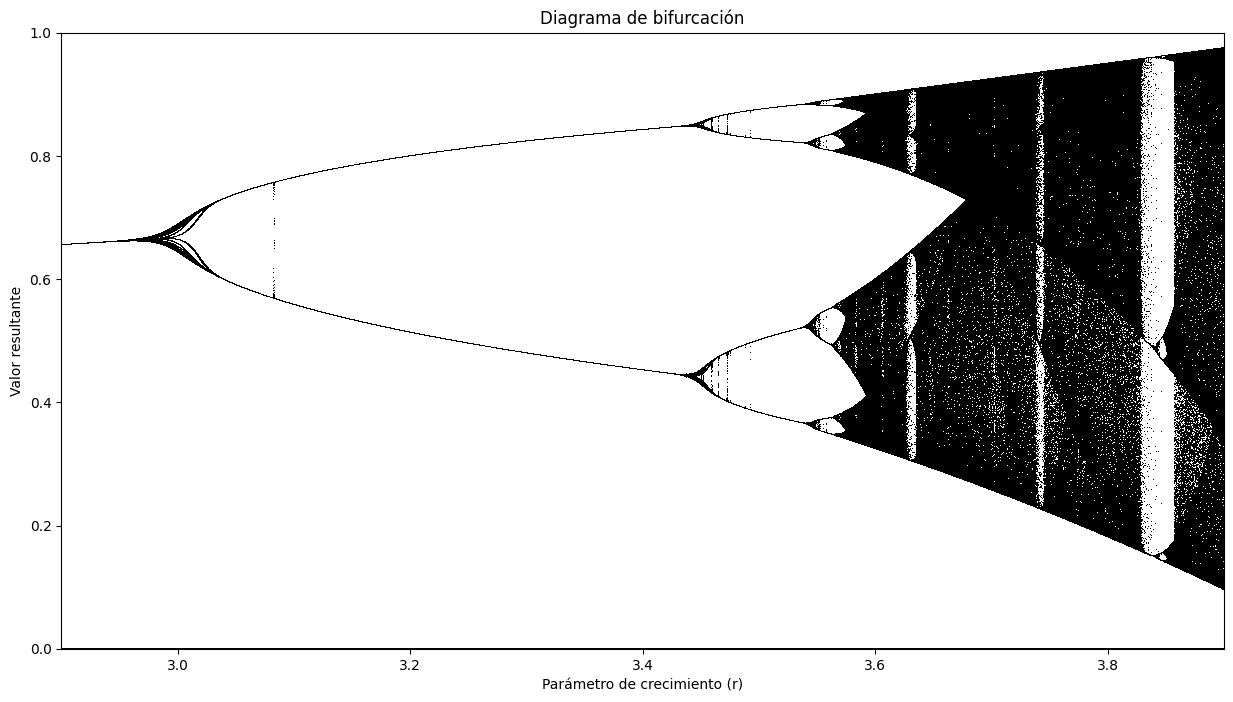

In [ ]:
# Convert string to float
values = np.array([float(x) if isinstance(x, str) else x for x in values])

# Ajustar la escala para los valores de semilla
scaled_data_values1 = values / np.max(values)

# Generar el diagrama de bifurcación
bifurcate(scaled_data_values1, 100, 10, r_min=2.9, r_max=3.9)


El diagrama de bifurcación muestra cómo cambian los valores resultantes en función del parámetro de crecimiento r en el modelo logístico. Los patrones en el gráfico revelan diferentes comportamientos del sistema, como bifurcaciones periódicas y caos, mientras que los puntos de bifurcación indican cambios significativos en el comportamiento del sistema. Este gráfico proporciona una representación visual clara de las propiedades dinámicas del sistema logístico y permite explorar cómo varían estas propiedades con diferentes valores de r.

####**Diagrama de población vs tasa de crecimiento los datos de colombia**

<Figure size 1500x600 with 0 Axes>

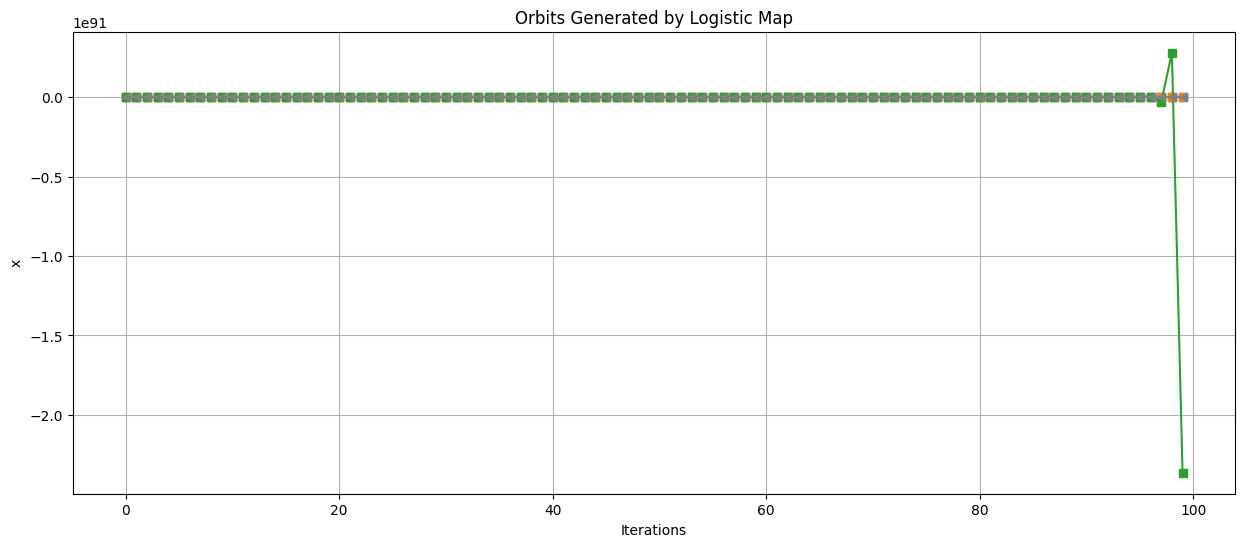

In [ ]:
# Number of iterations
n = 100

# Range of r values
r_range = np.linspace(2.9, 4.0, 5)

# Initial conditions
x0_1 = 0.4
x0_2 = 0.400000001

# Plot the orbits
generate_orbit(x0_1, x0_2, scaled_data_values1, r_range, n)

#**Información de los datos de suscripciones de banda ancha fija a nivel mundial**


Las suscripciones de banda ancha fija se refieren a las suscripciones fijas de acceso de alta velocidad a Internet público (una conexión TCP/IP), con velocidades de bajada iguales o superiores a 256 kbit/s. Esto incluye módems de cable, DSL, fibra óptica hasta el hogar/edificio, otras suscripciones de banda ancha fija (cableadas), banda ancha satelital y banda ancha inalámbrica fija terrestre. Este total se mide independientemente del método de pago. Excluye las suscripciones que tienen acceso a comunicaciones de datos (incluido Internet) a través de redes móviles celulares. Debería incluir WiMAX fijo y cualquier otra tecnología inalámbrica fija. Incluye tanto suscripciones residenciales como suscripciones para organizaciones.

Fuente: Unión Internacional de Telecomunicaciones, Informe sobre el Desarrollo Mundial de las Telecomunicaciones/TIC y base de datos.

https://datos.bancomundial.org/indicator/IT.NET.BBND?end=2022&locations=CO&start=2000&view=chart

In [ ]:
# URL del archivo en formato texto en GitHub
url = "https://raw.githubusercontent.com/SAN1713911S/suscripciones-a-banda-ancha-fija/main/suscripciones-a-banda-ancha-fija"

try:
    # Leer el archivo de texto desde la URL
    df = pd.read_csv(url, sep='\t')
    print(df.head())
except Exception as e:
    print("Error al cargar el archivo de texto:", e)

  Country Name Country Code                    Indicator Name Indicator Code  \
0        Aruba          ABW  Suscripciones a banda ancha fija    IT.NET.BBND   
1          NaN          AFE  Suscripciones a banda ancha fija    IT.NET.BBND   
2   Afganistán          AFG  Suscripciones a banda ancha fija    IT.NET.BBND   
3          NaN          AFW  Suscripciones a banda ancha fija    IT.NET.BBND   
4       Angola          AGO  Suscripciones a banda ancha fija    IT.NET.BBND   

   1960  1961  1962  1963  1964  1965  ...       2013       2014       2015  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ...    19200.0    19200.0    19000.0   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  2572220.0  3123787.0  3086933.0   
2   NaN   NaN   NaN   NaN   NaN   NaN  ...     1500.0     1500.0     7067.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ...   399466.0   489777.0   565867.0   
4   NaN   NaN   NaN   NaN   NaN   NaN  ...    22282.0    87750.0   153571.0   

        2016       2017       2018       201

##**Preprocesamiento de los datos**

In [ ]:
# Muestra las columnas del DataFrame
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [ ]:
# Muestra todos los valores de Country Name
df['Country Name'].unique()

array(['Aruba', nan, 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'El mundo árabe', 'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Samoa Americana', 'Antigua y Barbuda', 'Australia', 'Austria',
       'Azerbaiyán', 'Burundi', 'Bélgica', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrein', 'Bahamas',
       'Bosnia y Herzegovina', 'Belarús', 'Belice', 'Bermudas', 'Bolivia',
       'Brasil', 'Barbados', 'Brunei Darussalam', 'Bhután', 'Botswana',
       'República Centroafricana', 'Canadá',
       'Europa Central y del Báltico', 'Suiza', 'Islas del Canal',
       'Chile', 'China', "Côte d'Ivoire", 'Camerún',
       'Congo, República Democrática del', 'Congo, República del',
       'Colombia', 'Comoras', 'Cabo Verde', 'Costa Rica',
       'Estados pequeos del Caribe', 'Cuba', 'Curacao', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Djibouti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia',
       'Asia oriental y el P

In [ ]:
# Tu lista de países
paises_df = [
    'Aruba', 'Afganistán', 'Angola', 'Albania', 'Andorra', 'Emiratos Árabes Unidos',
    'Argentina', 'Armenia', 'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
    'Burundi', 'Bélgica', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas',
    'Bosnia y Herzegovina', 'Belarús', 'Belice', 'Bermudas', 'Bolivia', 'Brasil', 'Barbados',
    'Brunei Darussalam', 'Bhután', 'Botswana', 'Canadá', 'Suiza', 'Chile', 'China', "Côte d'Ivoire",
    'Camerún', 'Colombia', 'Comoras', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Chipre', 'República Checa',
    'Alemania', 'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador', 'Egipto, República Árabe de',
    'Eritrea', 'España', 'Estonia', 'Etiopía', 'Finlandia', 'Fiyi', 'Francia', 'Gabón', 'Reino Unido',
    'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Guinea Ecuatorial', 'Grecia', 'Granada',
    'Groenlandia', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong, Región Administrativa Especial', 'Honduras',
    'Croacia', 'Haití', 'Hungría', 'Indonesia', 'India', 'Irlanda', 'Irán, República Islámica del', 'Iraq',
    'Islandia', 'Israel', 'Italia', 'Jamaica', 'Jordania', 'Japón', 'Kazajstán', 'Kenia', 'Kirguistán',
    'Camboya', 'Saint Kitts y Nevis', 'Corea, República de', 'Kuwait', 'Líbano', 'Liberia', 'Libia',
    'Santa Lucía', 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lituania', 'Luxemburgo', 'Letonia',
    'Isla de San Martín (parte francesa)', 'Marruecos', 'Mónaco', 'República de Moldova', 'Madagascar',
    'Maldivas', 'México', 'Macedonia del Norte', 'Mali', 'Malta', 'Myanmar', 'Mongolia', 'Mauritania',
    'Mauricio', 'Malawi', 'Malasia', 'Namibia', 'Nueva Caledonia', 'Níger', 'Nigeria', 'Nicaragua',
    'Países Bajos', 'Noruega', 'Nepal', 'Nueva Zelanda', 'Omán', 'Pakistán', 'Panamá', 'Perú', 'Filipinas',
    'Polonia', 'Puerto Rico', 'Portugal', 'Paraguay', 'Ribera Occidental y Gaza', 'Polinesia Francesa', 'Catar',
    'Rumania', 'Federación de Rusia', 'Ruanda', 'Arabia Saudita', 'Sudán', 'Senegal', 'Singapur', 'Islas Salomón',
    'Sierra Leona', 'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'Sudán del Sur', 'Santo Tomé y Príncipe',
    'Surinam', 'Eslovaquia', 'Eslovenia', 'Suecia', 'Eswatini', 'Sint Maarten (parte holandesa)', 'Seychelles',
    'Islas Turcas y Caicos', 'Chad', 'Tailandia', 'Tayikistán', 'Turkmenistán', 'Timor-Leste', 'Tonga', 'Trinidad y Tobago',
    'Túnez', 'Turquía', 'Tuvalu', 'Tanzania', 'Uganda', 'Ucrania', 'Uruguay', 'Estados Unidos', 'Uzbekistán',
    'San Vicente y las Granadinas', 'Venezuela', 'Islas Vírgenes Británicas', 'Islas Vírgenes de los Estados Unidos',
    'Viet Nam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen', 'Sudáfrica', 'Zambia', 'Zimbabwe'
]

# Reemplazar los valores en df['Country Name'] usando el diccionario de mapeo
df = df[df['Country Name'].isin(paises_df)]

print(df)

    Country Name Country Code                    Indicator Name  \
0          Aruba          ABW  Suscripciones a banda ancha fija   
2     Afganistán          AFG  Suscripciones a banda ancha fija   
4         Angola          AGO  Suscripciones a banda ancha fija   
5        Albania          ALB  Suscripciones a banda ancha fija   
6        Andorra          AND  Suscripciones a banda ancha fija   
..           ...          ...                               ...   
260        Samoa          WSM  Suscripciones a banda ancha fija   
261       Kosovo          XKX  Suscripciones a banda ancha fija   
263    Sudáfrica          ZAF  Suscripciones a banda ancha fija   
264       Zambia          ZMB  Suscripciones a banda ancha fija   
265     Zimbabwe          ZWE  Suscripciones a banda ancha fija   

    Indicator Code  1960  1961  1962  1963  1964  1965  ...       2013  \
0      IT.NET.BBND   NaN   NaN   NaN   NaN   NaN   NaN  ...    19200.0   
2      IT.NET.BBND   NaN   NaN   NaN   NaN   Na

In [ ]:
df['Country Name'].unique()

array(['Aruba', 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahamas', 'Bosnia y Herzegovina', 'Belarús', 'Belice',
       'Bermudas', 'Bolivia', 'Brasil', 'Barbados', 'Brunei Darussalam',
       'Bhután', 'Botswana', 'Canadá', 'Suiza', 'Chile', 'China',
       "Côte d'Ivoire", 'Camerún', 'Colombia', 'Comoras', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Chipre', 'República Checa', 'Alemania',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto, República Árabe de', 'Eritrea', 'España', 'Estonia',
       'Etiopía', 'Finlandia', 'Francia', 'Gabón', 'Reino Unido',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Guinea Ecuatorial', 'Grecia', 'Granada', 'Groenlandia',
       'Guatemala', 'Guam', 'Guyana',
       'Hong Kong, Regió

In [ ]:
# Muestra todos los valores de Country Name
df['Indicator Name'].unique()

array(['Suscripciones a banda ancha fija'], dtype=object)

In [ ]:
#Mostrar la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    178 non-null    object 
 1   Country Code    178 non-null    object 
 2   Indicator Name  178 non-null    object 
 3   Indicator Code  178 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      float64


In [ ]:
# Eliminar las columnas 'Country Code' y 'Indicator Code'
df = df.drop(columns=['Country Code', 'Indicator Code','Indicator Name'])

# Muestra las columnas del DataFrame después de eliminar las columnas
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


In [ ]:
# Eliminar columnas que contienen solo ceros y aquellas que no tienen ningún valor
df = df.dropna(axis=1, how='all')  # Eliminar columnas sin valores no nulos
df = df.loc[:, (df != 0).any(axis=0)]  # Eliminar columnas que contienen solo ceros

# Imprimir el DataFrame limpio
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   1998          10 non-null     float64
 2   1999          15 non-null     float64
 3   2000          40 non-null     float64
 4   2001          74 non-null     float64
 5   2002          98 non-null     float64
 6   2003          117 non-null    object 
 7   2004          132 non-null    float64
 8   2005          149 non-null    float64
 9   2006          148 non-null    float64
 10  2007          159 non-null    float64
 11  2008          165 non-null    float64
 12  2009          166 non-null    float64
 13  2010          169 non-null    float64
 14  2011          163 non-null    float64
 15  2012          169 non-null    float64
 16  2013          171 non-null    float64
 17  2014          171 non-null    float64
 18  2015          171 non-null    float

In [ ]:
# Imputar los valores nulos con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

# Mostrar información sobre el DataFrame después de imputar los valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 265
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   1998          178 non-null    float64
 2   1999          178 non-null    float64
 3   2000          178 non-null    float64
 4   2001          178 non-null    float64
 5   2002          178 non-null    float64
 6   2003          117 non-null    object 
 7   2004          178 non-null    float64
 8   2005          178 non-null    float64
 9   2006          178 non-null    float64
 10  2007          178 non-null    float64
 11  2008          178 non-null    float64
 12  2009          178 non-null    float64
 13  2010          178 non-null    float64
 14  2011          178 non-null    float64
 15  2012          178 non-null    float64
 16  2013          178 non-null    float64
 17  2014          178 non-null    float64
 18  2015          178 non-null    float

In [ ]:
# Renombrar la columna 'Country Name' a 'Country'
df = df.rename(columns={'Country Name': 'Country'})

In [ ]:
df['Country'].count()

178

In [ ]:
df['Country'].unique()

array(['Aruba', 'Afganistán', 'Angola', 'Albania', 'Andorra',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahamas', 'Bosnia y Herzegovina', 'Belarús', 'Belice',
       'Bermudas', 'Bolivia', 'Brasil', 'Barbados', 'Brunei Darussalam',
       'Bhután', 'Botswana', 'Canadá', 'Suiza', 'Chile', 'China',
       "Côte d'Ivoire", 'Camerún', 'Colombia', 'Comoras', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Chipre', 'República Checa', 'Alemania',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto, República Árabe de', 'Eritrea', 'España', 'Estonia',
       'Etiopía', 'Finlandia', 'Francia', 'Gabón', 'Reino Unido',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Guinea Ecuatorial', 'Grecia', 'Granada', 'Groenlandia',
       'Guatemala', 'Guam', 'Guyana',
       'Hong Kong, Regió

In [ ]:
# Corregir el tipo de datos de la columna '2015' a float64
df['2003'] = pd.to_numeric(df['2003'], errors='coerce')

##**Linea de tiempo de suscripciones de banda ancha fija a nivel mundial**

In [ ]:
# Crear la figura con un tamaño más grande
fig = go.Figure()

# Obtener los nombres únicos de los países
countries = df['Country'].unique()

# Iterar sobre cada país y agregar la línea de tiempo correspondiente
for country in countries:
    # Filtrar el DataFrame por país
    country_data = df[df['Country'] == country]

    # Verificar si hay datos para el país actual
    if not country_data.empty:
        # Agregar la línea de tiempo para el país actual
        fig.add_trace(go.Scatter(x=country_data.columns[1:], y=country_data.iloc[0, 1:], mode='lines+markers', name=country))

# Configurar el diseño del gráfico y mostrar la leyenda
fig.update_layout(
    title='Suscripciones de banda ancha en todos los países (1960-2022)',
    xaxis=dict(title='Año', tickangle=45),
    yaxis=dict(title='Número de Suscripciones'),
    template='seaborn',  # Cambiar al tema oscuro para una mejor apariencia
    showlegend=True,     # Mostrar la leyenda
    legend=dict(orientation='v', x=1.02, y=0.5, bgcolor='rgba(0,0,0,0)', bordercolor='rgba(0,0,0,0)')  # Mejorar la posición y el estilo de la leyenda
)

# Ajustar el tamaño de la figura
fig.update_layout(
    autosize=False,
    width=1800,
    height=800,
)

# Mostrar la gráfica
fig.show()


In [ ]:
# Año de interés (puedes cambiar esto al año que desees)
year_of_interest = '2022'

# Filtrar el DataFrame por el año de interés
year_data = df[['Country', year_of_interest]]

# Eliminar filas con valores faltantes
year_data = year_data.dropna()

# Encontrar el país con el mayor número de suscripciones en el año de interés
max_subscription_country = year_data.loc[year_data[year_of_interest].idxmax()]

# Encontrar el país con el menor número de suscripciones en el año de interés
min_subscription_country = year_data.loc[year_data[year_of_interest].idxmin()]

# Mostrar los resultados
print(f"País con mayor número de suscripciones en {year_of_interest}: {max_subscription_country['Country']}, con {max_subscription_country[year_of_interest]} suscripciones")
print(f"País con menor número de suscripciones en {year_of_interest}: {min_subscription_country['Country']}, con {min_subscription_country[year_of_interest]} suscripciones")

País con mayor número de suscripciones en 2022: China, con 589648400.0 suscripciones
País con menor número de suscripciones en 2022: Chad, con 0.0 suscripciones


In [ ]:
# Año de interés (puedes cambiar esto al año que desees)
year_of_interest = '2022'

# Filtrar el DataFrame por el año de interés
year_data = df[['Country', year_of_interest]]

# Eliminar filas con valores faltantes
year_data = year_data.dropna()

# Calcular la cantidad total mundial de suscriptores en el año de interés
total_subscriptions_worldwide = year_data[year_of_interest].sum()

# Mostrar el resultado
print(f"Cantidad total mundial de suscriptores en {year_of_interest}: {total_subscriptions_worldwide} suscripciones")

Cantidad total mundial de suscriptores en 2022: 1738787320.1818185 suscripciones


In [ ]:
country_mapping_complete = {
    'Antigua y Barbuda': 'Antigua and Barbuda',
    'Argentina': 'Argentina',
    'Armenia': 'Armenia',
    'Aruba': 'Aruba',
    'Australia': 'Australia',
    'Austria': 'Austria',
    'Argelia': 'Algeria',
    'Azerbaiyán': 'Azerbaijan',
    'Bélgica': 'Belgium',
    'Bahamas': 'The Bahamas',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbados',
    'Belarús': 'Belarus',
    'Belice': 'Belize',
    'Bermudas': 'Bermuda',
    'Bolivia': 'Bolivia',
    'Bosnia y Herzegovina': 'Bosnia and Herzegovina',
    'Botswana': 'Botswana',
    'Brasil': 'Brazil',
    'Brunei Darussalam': 'Brunei',
    'Bulgaria': 'Bulgaria',
    'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi',
    'Camboya': 'Cambodia',
    'Camerún': 'Cameroon',
    'Canadá': 'Canada',
    'Cabo Verde': 'Cape Verde',
    'Islas Caimán': 'Cayman Islands',
    'República Centroafricana': 'Central African Republic',
    'Chad': 'Chad',
    'Chile': 'Chile',
    'China': 'China',
    'Colombia': 'Colombia',
    'Comoras': 'Comoros',
    'Congo, República Democrática del': 'Congo, Dem. Rep.',
    'Congo, República del': 'Congo, Rep.',
    'Costa Rica': 'Costa Rica',
    'Costa de Marfil': "Côte d'Ivoire",
    'Croacia': 'Croatia',
    'Cuba': 'Cuba',
    'Chipre': 'Cyprus',
    'República Checa': 'Czech Republic',
    'Dinamarca': 'Denmark',
    'Yibuti': 'Djibouti',
    'Dominica': 'Dominica',
    'República Dominicana': 'Dominican Republic',
    'Ecuador': 'Ecuador',
    'Egipto, República Árabe de': 'Egypt',
    'El Salvador': 'El Salvador',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Eritrea': 'Eritrea',
    'Estonia': 'Estonia',
    'Etiopía': 'Ethiopia',
    'Fiyi': 'Fiji',
    'Finlandia': 'Finland',
    'Francia': 'France',
    'Polinesia Francesa': 'French Polynesia',
    'Gabón': 'Gabon',
    'Gambia': 'Gambia',
    'Georgia': 'Georgia',
    'Alemania': 'Germany',
    'Ghana': 'Ghana',
    'Grecia': 'Greece',
    'Groenlandia': 'Greenland',
    'Granada': 'Grenada',
    'Guatemala': 'Guatemala',
    'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Guyana': 'Guyana',
    'Haití': 'Haiti',
    'Honduras': 'Honduras',
    'Hong Kong, Región Administrativa Especial': 'Hong Kong SAR, China',
    'Hungría': 'Hungary',
    'Islandia': 'Iceland',
    'India': 'India',
    'Indonesia': 'Indonesia',
    'Irán, República Islámica del': 'Iran',
    'Iraq': 'Iraq',
    'Irlanda': 'Ireland',
    'Israel': 'Israel',
    'Italia': 'Italy',
    'Jamaica': 'Jamaica',
    'Japón': 'Japan',
    'Jordania': 'Jordan',
    'Kazajstán': 'Kazakhstan',
    'Kenya': 'Kenya',
    'Kiribati': 'Kiribati',
    'Corea, República de': 'Korea, Rep.',
    'Kuwait': 'Kuwait',
    'Kirguistán': 'Kyrgyzstan',
    'Laos': 'Lao PDR',
    'Letonia': 'Latvia',
    'Líbano': 'Lebanon',
    'Lesotho': 'Lesotho',
    'Liberia': 'Liberia',
    'Libia': 'Libya',
    'Liechtenstein': 'Liechtenstein',
    'Lituania': 'Lithuania',
    'Luxemburgo': 'Luxembourg',
    'Macao, Región Administrativa Especial': 'Macao SAR, China',
    'Macedonia del Norte': 'North Macedonia',
    'Madagascar': 'Madagascar',
    'Malaui': 'Malawi',
    'Malasia': 'Malaysia',
    'Maldivas': 'Maldives',
    'Malí': 'Mali',
    'Malta': 'Malta',
    'Islas Marshall': 'Marshall Islands',
    'Mauritania': 'Mauritania',
    'Mauricio': 'Mauritius',
    'México': 'Mexico',
    'Micronesia, Estados Federados de': 'Micronesia, Fed. Sts.',
    'Moldavia': 'Moldova',
    'Mónaco': 'Monaco',
    'Mongolia': 'Mongolia',
    'Montenegro': 'Montenegro',
    'Marruecos': 'Morocco',
    'Mozambique': 'Mozambique',
    'Myanmar': 'Myanmar',
    'Namibia': 'Namibia',
    'Nauru': 'Nauru',
    'Nepal': 'Nepal',
    'Países Bajos': 'Netherlands',
    'Nueva Caledonia': 'New Caledonia',
    'Nueva Zelandia': 'New Zealand',
    'Nicaragua': 'Nicaragua',
    'Níger': 'Niger',
    'Nigeria': 'Nigeria',
    'Niue': 'Niue',
    'Noruega': 'Norway',
    'Omán': 'Oman',
    'Pakistán': 'Pakistan',
    'Palaos': 'Palau',
    'Panamá': 'Panama',
    'Papúa Nueva Guinea': 'Papua New Guinea',
    'Paraguay': 'Paraguay',
    'Perú': 'Peru',
    'Filipinas': 'Philippines',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Puerto Rico': 'Puerto Rico',
    'Qatar': 'Qatar',
    'Rumania': 'Romania',
    'Federación de Rusia': 'Russian Federation',
    'Ruanda': 'Rwanda',
    'San Cristóbal y Nieves': 'St. Kitts and Nevis',
    'Santa Lucía': 'St. Lucia',
    'San Vicente y las Granadinas': 'St. Vincent and the Grenadines',
    'Samoa': 'Samoa',
    'San Marino': 'San Marino',
    'Santo Tomé y Príncipe': 'Sao Tome and Principe',
    'Arabia Saudita': 'Saudi Arabia',
    'Senegal': 'Senegal',
    'Serbia': 'Serbia',
    'Seychelles': 'Seychelles',
    'Sierra Leona': 'Sierra Leone',
    'Singapur': 'Singapore',
    'Eslovaquia': 'Slovak Republic',
    'Eslovenia': 'Slovenia',
    'Islas Salomón': 'Solomon Islands',
    'Somalia': 'Somalia',
    'Sudáfrica': 'South Africa',
    'Sudán del Sur': 'South Sudan',
    'España': 'Spain',
    'Sri Lanka': 'Sri Lanka',
    'Sudán': 'Sudan',
    'Surinam': 'Suriname',
    'Suecia': 'Sweden',
    'Suiza': 'Switzerland',
    'República Árabe Siria': 'Syria',
    'Taiwan, Provincia de China': 'Taiwan',
    'Tayikistán': 'Tajikistan',
    'Tanzania, República Unida de': 'Tanzania',
    'Tailandia': 'Thailand',
    'Timor-Leste': 'Timor-Leste',
    'Togo': 'Togo',
    'Tonga': 'Tonga',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Túnez': 'Tunisia',
    'Turquía': 'Turkey',
    'Turkmenistán': 'Turkmenistan',
    'Tuvalu': 'Tuvalu',
    'Uganda': 'Uganda',
    'Ucrania': 'Ukraine',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Reino Unido': 'United Kingdom',
    'Estados Unidos': 'United States',
    'Uruguay': 'Uruguay',
    'Uzbekistán': 'Uzbekistan',
    'Vanuatu': 'Vanuatu',
    'Venezuela, República Bolivariana de': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen': 'Yemen',
    'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabwe',
    'Samoa Americana': 'American Samoa',
    'Curaçao': 'Curacao',
    'Sint Maarten (parte holandesa)': 'Sint Maarten (Dutch part)',
    'Timor Oriental': 'Timor-Leste',
    'Islas Vírgenes Británicas': 'British Virgin Islands',
    'Islas Vírgenes (EE.UU.)': 'Virgin Islands (U.S.)'
    }


# Aplicar el mapeo a los nombres de los países en tus datos
df['Country'] = df['Country'].map(country_mapping_complete).fillna(df['Country'])


In [ ]:
df['Country'].count()

178

##**Mapa de suscripciones a banda ancha nivel mundial**

In [ ]:
# Crear el mapa del mundo con Plotly Express
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2022',  # Seleccionar el año que deseas visualizar
                    color_continuous_scale='Viridis_r',
                    title='Número de Suscripciones de banda ancha en 2022',
                    labels={'2022': 'Número de Suscripciones'}
                    )

# Establecer el diseño del mapa
fig.update_geos(
    showcoastlines=True,
    projection_type='equirectangular'

)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=1500,  # Ancho de la figura
    height=800,  # Altura de la figura
)

fig.update_layout(
    title=dict(
        x=0.5,
        y=0.95,
        font=dict(size=18)
    )

)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Número de Suscripciones (Millones)',
        lenmode='pixels',
        tickfont=dict(size=14)  # Ajustar el tamaño de la fuente en las etiquetas
    )
)

# Mostrar el mapa interactivo
fig.show()

In [ ]:
# Filtrar solo la información de Colombia
df_colombia = df[df['Country'] == 'Colombia']

# Mostrar las primeras filas del DataFrame filtrado para verificar que se ha cargado correctamente
print(df_colombia.head())

     Country      1998           1999    2000     2001     2002     2003  \
45  Colombia  101378.8  277264.866667  8872.0  13830.0  34888.0  64436.0   

        2004      2005      2006  ...       2013       2014       2015  \
45  127113.0  318683.0  628077.0  ...  4537621.0  5028595.0  5525763.0   

         2016       2017       2018       2019       2020       2021  \
45  5912968.0  6331032.0  6678543.0  6949852.0  7764772.0  8434168.0   

         2022  
45  8799313.0  

[1 rows x 26 columns]


In [ ]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 45 to 45
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1 non-null      object 
 1   1998     1 non-null      float64
 2   1999     1 non-null      float64
 3   2000     1 non-null      float64
 4   2001     1 non-null      float64
 5   2002     1 non-null      float64
 6   2003     1 non-null      float64
 7   2004     1 non-null      float64
 8   2005     1 non-null      float64
 9   2006     1 non-null      float64
 10  2007     1 non-null      float64
 11  2008     1 non-null      float64
 12  2009     1 non-null      float64
 13  2010     1 non-null      float64
 14  2011     1 non-null      float64
 15  2012     1 non-null      float64
 16  2013     1 non-null      float64
 17  2014     1 non-null      float64
 18  2015     1 non-null      float64
 19  2016     1 non-null      float64
 20  2017     1 non-null      float64
 21  2018     1 non-null    

####**Preprocesamiento de los datos**

In [ ]:
# Eliminar valores nulos
df_colombia = df_colombia.loc[:, (df_colombia != 0).any(axis=0)]

In [ ]:
print(df_colombia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 45 to 45
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1 non-null      object 
 1   1998     1 non-null      float64
 2   1999     1 non-null      float64
 3   2000     1 non-null      float64
 4   2001     1 non-null      float64
 5   2002     1 non-null      float64
 6   2003     1 non-null      float64
 7   2004     1 non-null      float64
 8   2005     1 non-null      float64
 9   2006     1 non-null      float64
 10  2007     1 non-null      float64
 11  2008     1 non-null      float64
 12  2009     1 non-null      float64
 13  2010     1 non-null      float64
 14  2011     1 non-null      float64
 15  2012     1 non-null      float64
 16  2013     1 non-null      float64
 17  2014     1 non-null      float64
 18  2015     1 non-null      float64
 19  2016     1 non-null      float64
 20  2017     1 non-null      float64
 21  2018     1 non-null    

####**Análisis de los datos**

In [ ]:
# Estadísticas descriptivas
df_colombia.describe()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0
25%,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0
50%,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0
75%,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0
max,101378.8,277264.866667,8872.0,13830.0,34888.0,64436.0,127113.0,318683.0,628077.0,1207090.0,...,4537621.0,5028595.0,5525763.0,5912968.0,6331032.0,6678543.0,6949852.0,7764772.0,8434168.0,8799313.0


In [ ]:
# Promedio
# Calculamos el promedio de cada columna
mean_values = df_colombia.mean(numeric_only=True)

# Ordenamos los promedios de forma descendente
mean_values_sorted = mean_values.sort_values(ascending=False)

# Mostramos los promedios de mayor a menor
print(mean_values_sorted)

2022    8.799313e+06
2021    8.434168e+06
2020    7.764772e+06
2019    6.949852e+06
2018    6.678543e+06
2017    6.331032e+06
2016    5.912968e+06
2015    5.525763e+06
2014    5.028595e+06
2013    4.537621e+06
2012    3.938657e+06
2011    3.348142e+06
2010    2.643033e+06
2009    2.114782e+06
2008    1.772088e+06
2007    1.207090e+06
2006    6.280770e+05
2005    3.186830e+05
1999    2.772649e+05
2004    1.271130e+05
1998    1.013788e+05
2003    6.443600e+04
2002    3.488800e+04
2001    1.383000e+04
2000    8.872000e+03
dtype: float64



Los datos muestran el promedio anual del número de suscripciones de banda ancha en Colombia desde 2000 hasta 2022, con cifras expresadas en millones. La tendencia es ascendente, con un crecimiento notable en los últimos años. En 2022, el promedio alcanzó aproximadamente 8.8 millones de suscripciones, lo que indica un fuerte impulso en la adopción de servicios de banda ancha en el país. Este incremento refleja la creciente importancia de internet de alta velocidad en Colombia, posiblemente impulsado por el aumento de la conectividad, la expansión de infraestructuras de telecomunicaciones y el crecimiento del uso de servicios en línea.

In [ ]:
# Obtener los años y sus respectivos valores para Colombia
years = df_colombia.columns[3:]
values = df_colombia.iloc[:, 3:].values.flatten()

In [ ]:
values

array([   8872.,   13830.,   34888.,   64436.,  127113.,  318683.,
        628077., 1207090., 1772088., 2114782., 2643033., 3348142.,
       3938657., 4537621., 5028595., 5525763., 5912968., 6331032.,
       6678543., 6949852., 7764772., 8434168., 8799313.])

In [ ]:
years

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

####**Linea de tiempo de suscripciones de banda ancha en Colombia**

In [ ]:
# Crear la figura
fig = go.Figure()

# Agregar la línea de tiempo
fig.add_trace(go.Scatter(x=years, y=values, mode='lines+markers', name='Suscripciones de banda ancha'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Suscripciones a banda ancha en Colombia (2000-2022)',
    xaxis=dict(title='Año', tickangle=45),
    yaxis=dict(title='Número de Suscripciones'),
    template='seaborn'  # Aplicar un tema oscuro para un estilo más atractivo
)

# Mostrar la gráfica
fig.show()


Los datos revelan un crecimiento constante en las suscripciones de banda ancha  en Colombia a lo largo de los años, con puntos de inflexión destacados en 2008, 2010, 2012, 2013 y 2021, que señalan cambios significativos en la tasa de adopción de la tecnología de internet fija. Estos puntos sugieren eventos o desarrollos importantes en el sector de las telecomunicaciones que han influido en la dinámica del mercado. Estos hallazgos enriquecen nuestra comprensión de la evolución en Colombia, resaltando períodos de mayor dinamismo y posibles avances disruptivos en la industria.

####**Diagrama de bifurcación para los datos de colombia**

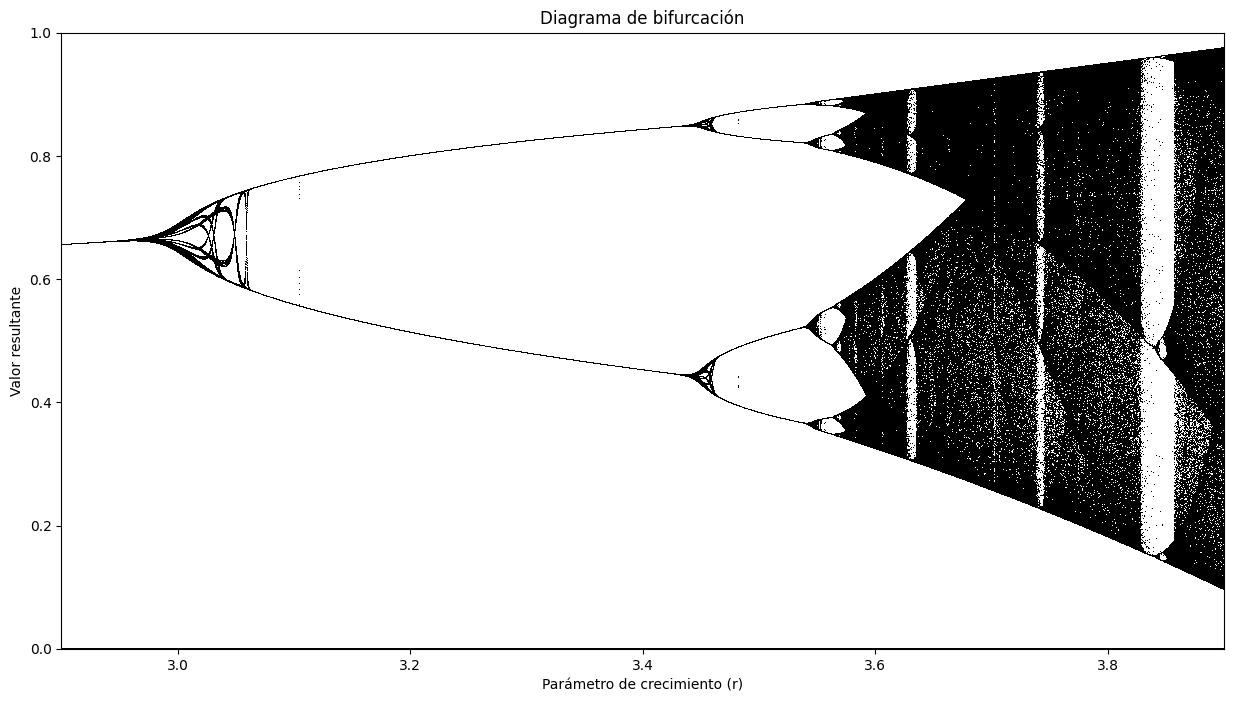

In [ ]:
# Convert string to float
values = np.array([float(x) if isinstance(x, str) else x for x in values])

# Ajustar la escala para los valores de semilla
scaled_data_values2 = values / np.max(values)

# Generar el diagrama de bifurcación
bifurcate(scaled_data_values2, 100, 10, r_min=2.9, r_max=3.9)


El diagrama de bifurcación muestra cómo cambian los valores resultantes en función del parámetro de crecimiento r en el modelo logístico. Los patrones en el gráfico revelan diferentes comportamientos del sistema, como bifurcaciones periódicas y caos, mientras que los puntos de bifurcación indican cambios significativos en el comportamiento del sistema. Este gráfico proporciona una representación visual clara de las propiedades dinámicas del sistema logístico y permite explorar cómo varían estas propiedades con diferentes valores de r.

####**Diagrama de población vs tasa de crecimiento los datos de colombia**

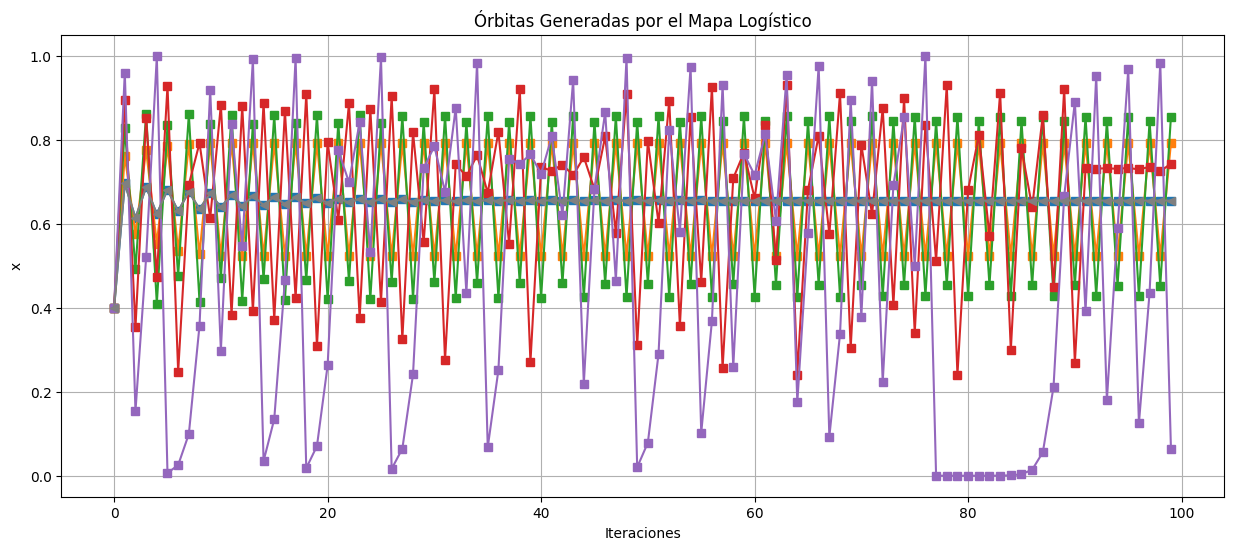

In [ ]:
# Number of iterations
n = 100

# Range of r values
r_range = np.linspace(2.9, 4.0, 5)

# Initial conditions
x0_1 = 0.4
x0_2 = 0.400000001

# Plot the orbits
generate_orbit(x0_1, x0_2, scaled_data_values2, r_range, n)

#**Conclusión**

Utilizando datos históricos reales de conexiones a internet en Colombia, tanto móviles como fijas, hemos aplicado un modelo de bifurcación logística para simular el comportamiento caótico del crecimiento del sistema a lo largo de los años. Este enfoque nos ha permitido visualizar de manera efectiva cómo el sistema ha experimentado un crecimiento no lineal y caótico, reflejando la complejidad inherente de su evolución. A través del modelamiento del diagrama de bifurcación para ambos sistemas, hemos logrado demostrar este comportamiento caótico, lo que sugiere la presencia de una dinámica no determinista, esto significa que el comportamiento del sistema no puede predecirse completamente debido a la presencia de factores impredecibles y variables que pueden influir en su evolución. En el proceso de adopción de conexiones a internet en Colombia. Este análisis contribuye significativamente a nuestra comprensión del aumento sostenido de las conexiones a internet en el país, destacando la necesidad de abordar este fenómeno desde una perspectiva compleja y dinámica.






El crecimiento exponencial de las conexiones móviles y fijas de Internet en Colombia desde 1994 hasta 2022 ha sido influenciado por una variedad de factores interrelacionados. Aquí hay algunos de los principales:



*   Avances tecnológicos: El desarrollo y la mejora continua de las tecnologías de comunicación, como el 2G, 3G, 4G y 5G, han permitido una mayor velocidad y capacidad de las conexiones móviles, lo que ha incentivado su adopción.
*   Disminución de costos: A medida que la tecnología ha avanzado y se han desarrollado economías de escala, los costos asociados con la infraestructura y los dispositivos móviles y de Internet fijo han disminuido, lo que ha hecho que estos servicios sean más accesibles para una mayor parte de la población.
*   Expansión de la cobertura: La ampliación de la cobertura de redes móviles y fijas a áreas previamente no atendidas o subatendidas ha permitido que más personas accedan a Internet en todo el país.
*   Aumento de la penetración de smartphones: La creciente disponibilidad y asequibilidad de los smartphones ha permitido que un mayor número de personas accedan a Internet a través de dispositivos móviles.
*   Políticas gubernamentales y regulación: Las políticas gubernamentales que fomentan la competencia en el mercado de las telecomunicaciones y que promueven la inversión en infraestructura han contribuido al crecimiento del acceso a Internet en Colombia.
*    Demanda de servicios digitales: El aumento en la demanda de servicios digitales, como redes sociales, aplicaciones de mensajería, servicios de streaming, comercio electrónico, entre otros, ha impulsado la adopción de Internet tanto móvil como fijo.
*   Digitalización de la economía: La digitalización de los procesos comerciales y gubernamentales ha llevado a una mayor necesidad de acceso a Internet tanto para individuos como para empresas.
*   Educación y conciencia: Los esfuerzos para educar a la población sobre los beneficios del acceso a Internet y cómo utilizarlo de manera efectiva han contribuido a aumentar la adopción de conexiones móviles y fijas.